# K-Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

import helper

In [2]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


In [3]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [4]:

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE: ', mse) 



MSE:  2.5365211023476384


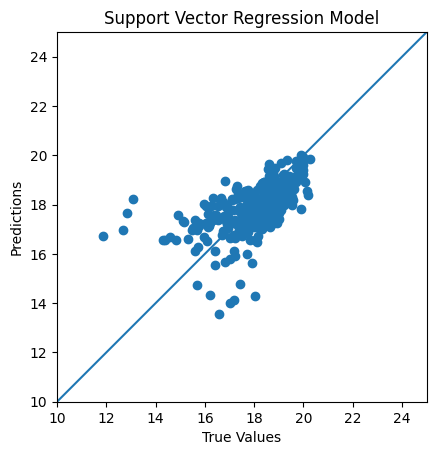

In [5]:
plt.scatter(y_test, y_pred)
plt.title('Support Vector Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])

In [7]:
ratio = helper.revenue_exp(y_test) / helper.revenue_exp(y_pred)
print(ratio.describe())


count    2.990000e+02
mean     1.897746e+00
std      3.390421e+00
min      3.898921e-07
25%      6.112263e-01
50%      1.212389e+00
75%      2.039985e+00
max      4.212413e+01
Name: revenue, dtype: float64
